In [1]:
!pip install -q pycaret
!pip install -q gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 589.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 901.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 978.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 973.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 1.2 MB/s eta 0:00:00
 

In [2]:
import pycaret
from pycaret.datasets import get_data

In [24]:
dataset = get_data('titanic')
target = 'Survived'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
dataset = dataset.drop(['PassengerId'], axis=1)
dataset = dataset.drop(['Ticket'], axis=1)
dataset = dataset.drop(['Cabin'], axis=1)
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [26]:
from pycaret.classification import *
class_exp = ClassificationExperiment()
class_exp.setup(dataset, target=target)

,Description,Value
0,Session id,554
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 9)"
4,Transformed data shape,"(891, 11)"
5,Transformed train set shape,"(623, 11)"
6,Transformed test set shape,"(268, 11)"
7,Numeric features,5
8,Categorical features,3
9,Rows with missing values,20.1%


In [27]:
class_exp.models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [28]:
model = class_exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8043,0.8488,0.6862,0.7780,0.7266,0.5757,0.5804,0.1810
ridge,Ridge Classifier,0.7882,0.8484,0.5109,0.9023,0.6446,0.5116,0.5571,0.1860
knn,K Neighbors Classifier,0.7063,0.7510,0.5478,0.6426,0.5870,0.3621,0.3680,0.1280
lda,Linear Discriminant Analysis,0.6309,0.5394,0.0696,0.0696,0.0696,0.0516,0.0516,0.1080
et,Extra Trees Classifier,0.6196,0.6777,0.0083,0.2000,0.0160,0.0102,0.0323,0.2530
nb,Naive Bayes,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1130
dt,Decision Tree Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1130
rf,Random Forest Classifier,0.6164,0.8314,0.0000,0.0000,0.0000,0.0000,0.0000,0.4820
qda,Quadratic Discriminant Analysis,0.6164,0.6076,0.0000,0.0000,0.0000,0.0000,0.0000,0.1090
ada,Ada Boost Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1110


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

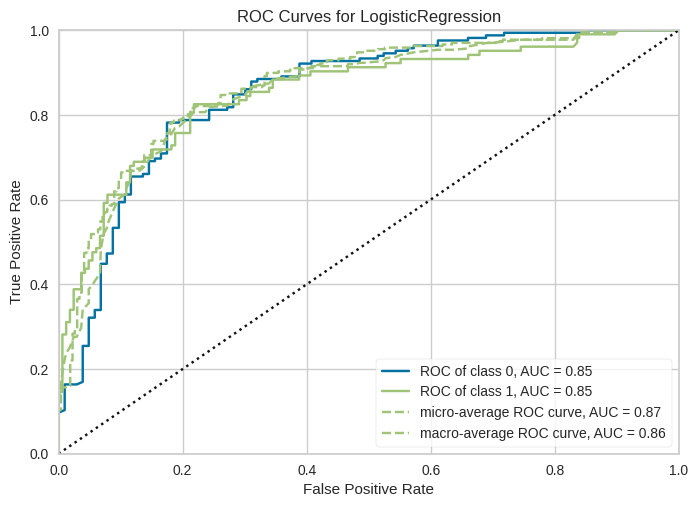

In [29]:
class_exp.plot_model(model)

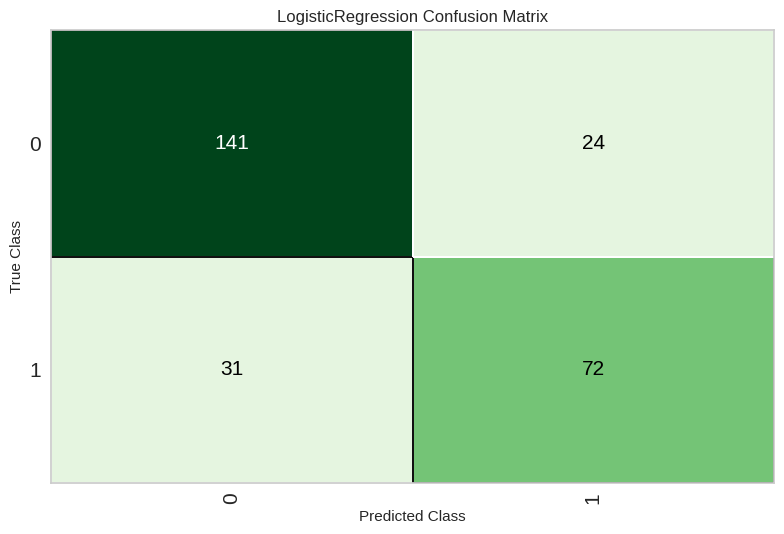

In [30]:
class_exp.plot_model(model, plot='confusion_matrix')

In [36]:
class_exp.evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [32]:
class_exp.create_app(model, app_kwargs={})

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://d28c253fbd09d1e787.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [33]:
prediction = class_exp.predict_model(model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7948,0.8539,0.6990,0.7500,0.7236,0.5607,0.5616


In [34]:
prediction.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,prediction_label,prediction_score
350,3,"Odahl, Mr. Nils Martin",male,23.0,0,0,9.2250,S,0,0,0.8456
815,1,"Fry, Mr. Richard",male,NaN,0,0,0.0000,S,0,0,0.6058
830,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,14.4542,C,1,1,0.7207
387,2,"Buss, Miss. Kate",female,36.0,0,0,13.0000,S,1,1,0.6610
775,3,"Myhrman, Mr. Pehr Fabian Oliver Malkolm",male,18.0,0,0,7.7500,S,0,0,0.8245


In [35]:
class_exp.save_model(model, 'Titanic pipeline')
pipeline = class_exp.load_model('Titanic pipeline')
pipeline

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Pclass', 'Age', 'SibSp', 'Parch',
                                             'Fare'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 TransformerWrapper(exclude=None,
                                    in...
                                                              handle_unknown='value',
                                                              hierarchy=None,
                                                              min_samples_leaf=20,
                                                              return_df=True,
                                                              smoothing=10,
                                                              verbose=0))),
                ('trained_model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=554,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)